# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_agg_2h_mv_input.csv'


file_tag = "Gira Bike"


# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


In [4]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(filepath, decimal=",", index_col='date', parse_dates=True, infer_datetime_format=True)

# Verificar os tipos de dados antes da conversão
display(data.dtypes)

# Forçar a conversão para o tipo numérico para todas as colunas que devem ser numéricas
# Selecionando todas as colunas, exceto o índice (que é de data)
numeric_columns = data.columns.difference(['date'])

# Tentar converter as colunas numéricas
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verifique o tipo das colunas após a conversão
print("\nTipos de dados após a conversão:")
display(data.dtypes)

# Exibir as últimas linhas para confirmar que os dados estão corretos
display(data.tail())

display(data.index.min())
display(data.index.max())

display(data.shape)

target='target_station_load_rate'

test_split_threshold = 0.90

data.info()



temperature_2m                                                 object
rain_mm                                                        object
wmo_weather_code                                                int64
wind_speed_10m                                                 object
is_holiday_lisbon                                              object
target_station_status                                          object
target_station_load_rate                                       object
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       object
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       object
station_load_rate_ Praça de Londres                            object
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    object
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    object
dtype: object


Tipos de dados após a conversão:


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-03-31 14:00:00,19.6,0.0,3,15.2,0.0,0.0,32.0,64.3,26.9,30.0,43.5,15.0
2023-03-31 16:00:00,18.5,0.0,3,14.3,0.0,1.0,33.3,48.2,25.0,31.1,38.4,11.4
2023-03-31 18:00:00,16.4,0.0,3,9.7,0.0,1.0,17.6,30.0,51.9,40.0,21.0,20.0
2023-03-31 20:00:00,14.1,0.0,3,6.0,0.0,1.0,30.9,50.0,36.7,13.8,18.1,27.1
2023-03-31 22:00:00,12.8,0.0,3,5.6,0.0,1.0,58.0,45.3,36.7,30.0,10.1,30.0


Timestamp('2022-01-01 12:00:00')

Timestamp('2023-03-31 22:00:00')

(5421, 12)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5421 entries, 2022-01-01 12:00:00 to 2023-03-31 22:00:00
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               5421 non-null   float64
 1   rain_mm                                                      5421 non-null   float64
 2   wmo_weather_code                                             5421 non-null   int64  
 3   wind_speed_10m                                               5421 non-null   float64
 4   is_holiday_lisbon                                            5421 non-null   float64
 5   target_station_status                                        5421 non-null   float64
 6   target_station_load_rate                                     5421 non-null   float64
 7   station_load_rate_ Rua do Arco Cego / Av. 

In [5]:

def series_train_test_split(data: Series, trn_pct: float = 0.80) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()

    # If data is a DataFrame, select the first column
    if isinstance(df_cp, pd.DataFrame):
        df_cp = df_cp.iloc[:, 0]  # Select first column to ensure it's a Series

    train: Series = df_cp.iloc[:trn_size]  
    test: Series = df_cp.iloc[trn_size:]  

    return train, test

In [6]:

# Function to split the series into train and test sets
def series_train_test_split(series, trn_pct=0.90):
    train_size = int(len(series) * trn_pct)
    train, test = series[:train_size], series[train_size:]
    return train, test

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    HEIGHT=6
    # Plot the metrics
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    return axs

# Scaling

- O que o Scaling Faz?
- O scaling (padronização) é uma técnica de pré-processamento de dados que transforma as variáveis para que elas tenham média zero e desvio padrão igual a 1. Isso é feito usando a fórmula:

- z = x − μ / σ 
 
Onde:

- x: Valor original.
- μ: Média da variável.
- σ: Desvio padrão da variável.
- z: Valor padronizado.

## Scaling 0 (No scaling)

#### df_0 - Creating series for original df with time +target variable

In [7]:
def plot_line_chart(
    xvalues: list,
    yvalues: list,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    name: str = "",
    percentage: bool = False,
    show_stdev: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    ax = set_chart_xticks(xvalues, ax, percentage=percentage)
    if any(y < 0 for y in yvalues) and percentage:
            ax.set_ylim(-1.0, 1.0)
    ax.plot(xvalues, yvalues, c=LINE_COLOR, label=name)
    if show_stdev:
        stdev: float = round(std(yvalues), 3)
        y_bottom: list[float] = [(y - stdev) for y in yvalues]
        y_top: list[float] = [(y + stdev) for y in yvalues]
        ax.fill_between(xvalues, y_bottom, y_top, color=FILL_COLOR, alpha=0.2)

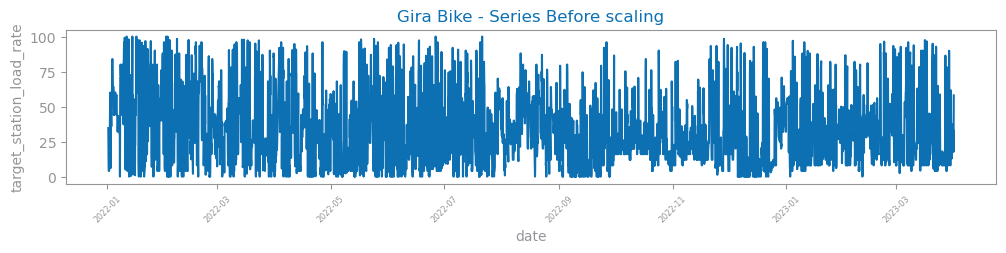

In [8]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_0 = data.copy()

df_0: DataFrame = data_0
#series - series of original df with no transformation
series: Series = df_0[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} - Series Before scaling",
)
show()

### Evaluate

In [9]:
from pandas import Series, DataFrame

def series_train_test_split(data, trn_pct: float = 0.90):
    trn_size: int = int(len(data) * trn_pct)
    df_cp = data.copy()

    if isinstance(df_cp, Series):
        train: Series = df_cp.iloc[:trn_size]
        test: Series = df_cp.iloc[trn_size:]
    elif isinstance(df_cp, DataFrame):
        train: DataFrame = df_cp.iloc[:trn_size]
        test: DataFrame = df_cp.iloc[trn_size:]
    else:
        raise TypeError("Input must be a Series or DataFrame.")

    return train, test

def dataframe_temporal_train_test_split(data: DataFrame, trn_pct: float = 0.90) -> tuple[DataFrame, DataFrame]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: DataFrame = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test

In [10]:
from math import sqrt
from matplotlib.pyplot import subplots
from pandas import Series

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list:
    # Calculate evaluation metrics
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values and sizes of train and test sets
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"Train size: {len(trn)}")
    print(f"Test size: {len(tst)}")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    # Plot the metrics
    HEIGHT = 6
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)

    return axs

In [11]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Evaluation - No Scaling) ###
Train size: 4878
Test size: 543
RMSE - Train: 24.3239, Test: 25.2810
MAE - Train: 19.8986, Test: 18.2116
MAPE - Train: 7812403557968222.0000, Test: 0.8347
R2 - Train: 0.0322, Test: -0.0948



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

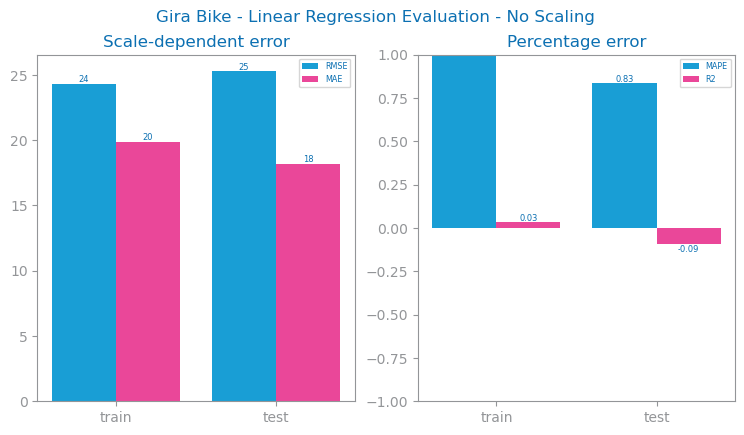

In [13]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series = series.sort_index()

train_0, test_0 = series_train_test_split(series, trn_pct=test_split_threshold)

trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0.to_numpy()
tstX_0 = arange(len(train_0), len(series)).reshape(-1, 1)
tstY_0 = test_0.to_numpy()

model = LinearRegression()
model.fit(trnX_0, trnY_0)

prd_trn_0: Series = Series(model.predict(trnX_0), index=train_0.index)
prd_tst_0: Series = Series(model.predict(tstX_0), index=test_0.index)

plot_forecasting_eval(train_0, test_0, prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression Evaluation - No Scaling")

### Plot

<Axes: xlabel='date', ylabel='target_station_load_rate'>

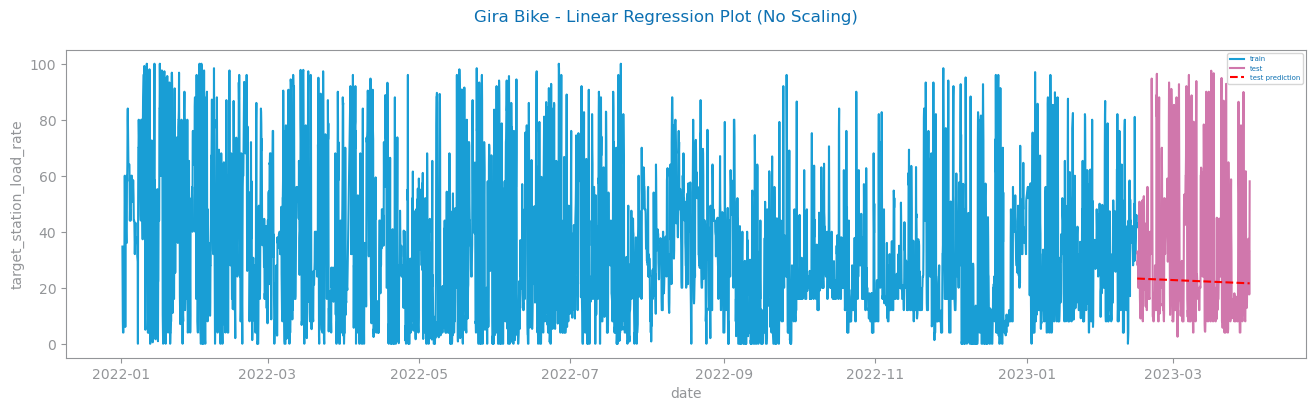

In [15]:
plot_forecasting_series(
    train_0,
    test_0,
    prd_tst_0,
    title=f"{file_tag} - Linear Regression Plot (No Scaling)",
    xlabel="date",
    ylabel=target,
)

## Scaling Treat 1 - Standard Scaler

### Strategy Application

In [16]:
from sklearn.preprocessing import StandardScaler

def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()
    transf: StandardScaler = StandardScaler().fit(data)
    df = DataFrame(transf.transform(data), index=data.index)
    df.columns = vars
    return df

#### df_1 - Creating series for scaled df with time +target variable

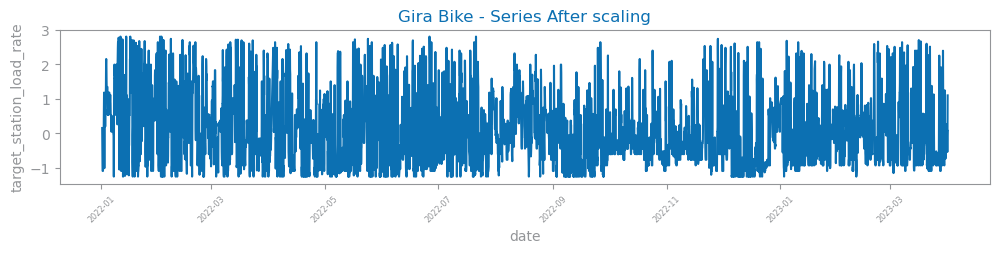

In [17]:

data_1 = data.copy()

df_1: DataFrame = scale_all_dataframe(data_1)

#series_scaled - series of df with scaling applied
series_scaled: Series = df_1[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_scaled.index.to_list(),
    series_scaled.to_list(),
    xlabel=series_scaled.index.name,
    ylabel=target,
    title=f"{file_tag} - Series After scaling",
)
show()

### Evaluate

In [18]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Evaluation With Scaling) ###
Train size: 4878
Test size: 543
RMSE - Train: 0.9859, Test: 1.0247
MAE - Train: 0.8066, Test: 0.7382
MAPE - Train: 1.2797, Test: 1.7767
R2 - Train: 0.0322, Test: -0.0948



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

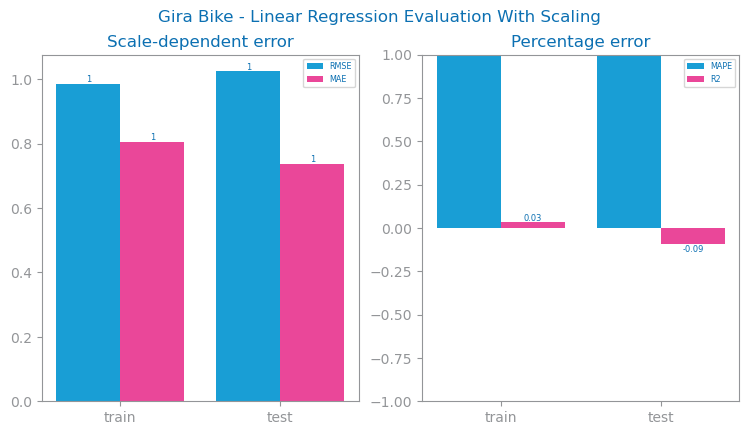

In [20]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series_scaled = series_scaled.sort_index()

train_1, test_1 = series_train_test_split(series_scaled, trn_pct=test_split_threshold)

trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1.to_numpy()
tstX_1 = arange(len(train_1), len(series_scaled)).reshape(-1, 1)
tstY_1 = test_1.to_numpy()

model = LinearRegression()
model.fit(trnX_1, trnY_1)

prd_trn_1: Series = Series(model.predict(trnX_1), index=train_1.index)
prd_tst_1: Series = Series(model.predict(tstX_1), index=test_1.index)

plot_forecasting_eval(train_1, test_1, prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Evaluation With Scaling")

In [21]:
print("Train - Min Date:", train_1.index.min(), " | Max Date:", train_1.index.max())
print("Test - Min Date:", test_1.index.min(), " | Max Date:", test_1.index.max())

Train - Min Date: 2022-01-01 12:00:00  | Max Date: 2023-02-14 12:00:00
Test - Min Date: 2023-02-14 14:00:00  | Max Date: 2023-03-31 22:00:00


## Linear Regression Plot

In [188]:
display(df_0.head())
display(df_0.shape)
display(df_1.head())
display(df_1.shape)

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 12:00:00,17.4,0.0,3,5.5,1.0,1.0,34.7,28.6,47.4,60.0,12.3,16.7
2022-01-01 14:00:00,18.6,0.0,3,5.8,1.0,1.0,20.0,14.3,37.2,68.0,13.0,13.3
2022-01-01 16:00:00,16.7,0.0,2,6.2,1.0,1.0,8.0,30.4,8.6,43.6,4.3,7.5
2022-01-01 18:00:00,13.9,0.0,3,7.6,1.0,1.0,4.0,20.0,25.6,15.0,0.0,10.0
2022-01-01 20:00:00,13.8,0.0,3,8.8,1.0,1.0,4.0,21.4,35.9,27.5,15.2,10.0


(5421, 12)

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 12:00:00,0.209711,-0.185984,-0.266712,-1.183773,5.395986,0.056934,0.155489,-0.295052,0.545027,0.563042,-0.841692,-0.495891
2022-01-01 14:00:00,0.438713,-0.185984,-0.266712,-1.135627,5.395986,0.056934,-0.440362,-0.892822,0.131458,0.846781,-0.807433,-0.673815
2022-01-01 16:00:00,0.076126,-0.185984,-0.325721,-1.071433,5.395986,0.056934,-0.926771,-0.219808,-1.028156,-0.018624,-1.233225,-0.977332
2022-01-01 18:00:00,-0.458211,-0.185984,-0.266712,-0.846751,5.395986,0.056934,-1.088907,-0.654550,-0.338875,-1.032993,-1.443674,-0.846506
2022-01-01 20:00:00,-0.477295,-0.185984,-0.266712,-0.654167,5.395986,0.056934,-1.088907,-0.596027,0.078749,-0.589650,-0.699762,-0.846506


(5421, 12)

<Axes: xlabel='date', ylabel='target_station_load_rate'>

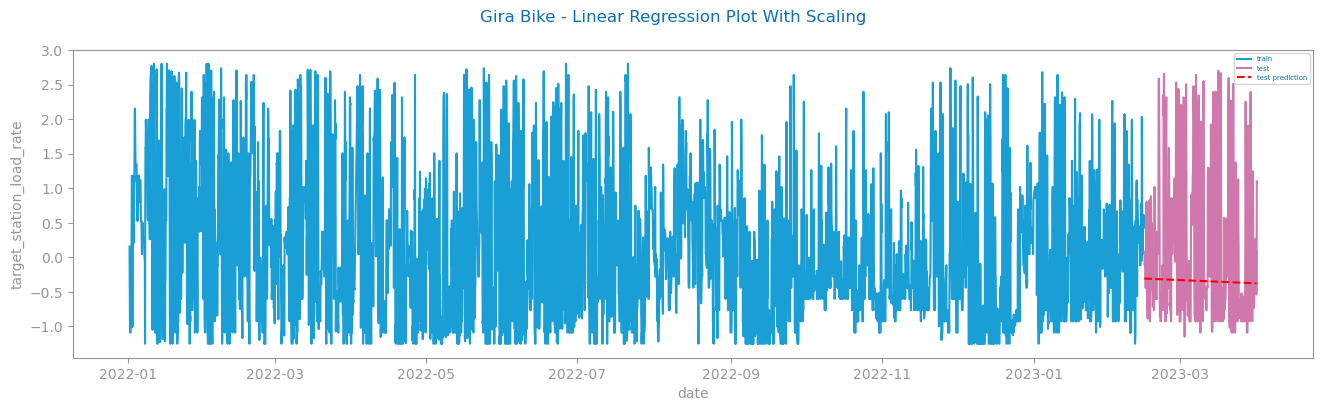

In [23]:
plot_forecasting_series(
    train_1,
    test_1,
    prd_tst_1,
    title=f"{file_tag} - Linear Regression Plot With Scaling",
    xlabel="date",
    ylabel=target,
)

## Approach uplift comparison

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Pequena constante para evitar divisão por zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calcular métricas para cada modelo
metrics = {
    "Model": ["No Scaling", "With Scaling"],
    "MAE": [
        mean_absolute_error(test_0, prd_tst_0),
        mean_absolute_error(test_1, prd_tst_1)
    ],
    "MSE": [
        mean_squared_error(test_0, prd_tst_0),
        mean_squared_error(test_1, prd_tst_1)
    ],
    "RMSE": [
        mean_squared_error(test_0, prd_tst_0, squared=False),
        mean_squared_error(test_1, prd_tst_1, squared=False)
    ],
    "R²": [
        r2_score(test_0, prd_tst_0),
        r2_score(test_1, prd_tst_1)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0, prd_tst_0),
        mean_absolute_percentage_error(test_1, prd_tst_1)
    ]
}

# Criar DataFrame para exibir as métricas
performance_df = pd.DataFrame(metrics)
display(performance_df)


,Model,MAE,MSE,RMSE,R²,MAPE
0,No Scaling,18.211648,639.131199,25.281044,-0.094783,83.469976
1,With Scaling,0.738193,1.050101,1.024744,-0.094783,177.671712


## Analysis of results after Transformation

- Analysis:
    - df_1, presents best results in MAPE after scaling. The other results are equally low for the forecasting
- How to proceed?
    - We will proceed for the next trasnformation step, with df_1(dataset scaled with StandardScaler). 

# Save to csv

In [25]:

# Select the DataFrame to save
data_save = df_1  
# Reset the index as data and save as csv
data_save.reset_index(inplace=True)
data_save.to_csv(f"data/df_gira_agg_2h_scaling_input.csv", index=False)